# Import Libraries

### Ibad Ur Rahman
### 23MDBCS421
### Data Science
### Semester 5th
### Lab Task 12
### Dr.Tariq Sadad

In [1]:
# CELL 1: Install and import required libraries
!pip install networkx matplotlib -q

import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

### Create Your Exact Graph

In [2]:
# CELL 2: Create the Exact Graph from Your Image
G = nx.Graph()

# Add nodes
nodes = [1,2,3,4,5,6,7,8,9,10]
G.add_nodes_from(nodes)

# Add edges based on your graph image (central clique 4-6-7-10 + outer connections)
edges = [
    (1,3), (1,4),
    (2,4), (2,5),
    (3,4), (3,6),
    (4,5), (4,6), (4,7), (4,10),
    (5,7),
    (6,7), (6,9), (6,10),
    (7,8), (7,10),
    (8,9), (9,10)
]

G.add_edges_from(edges)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph created with 10 nodes and 18 edges


### Draw the Graph

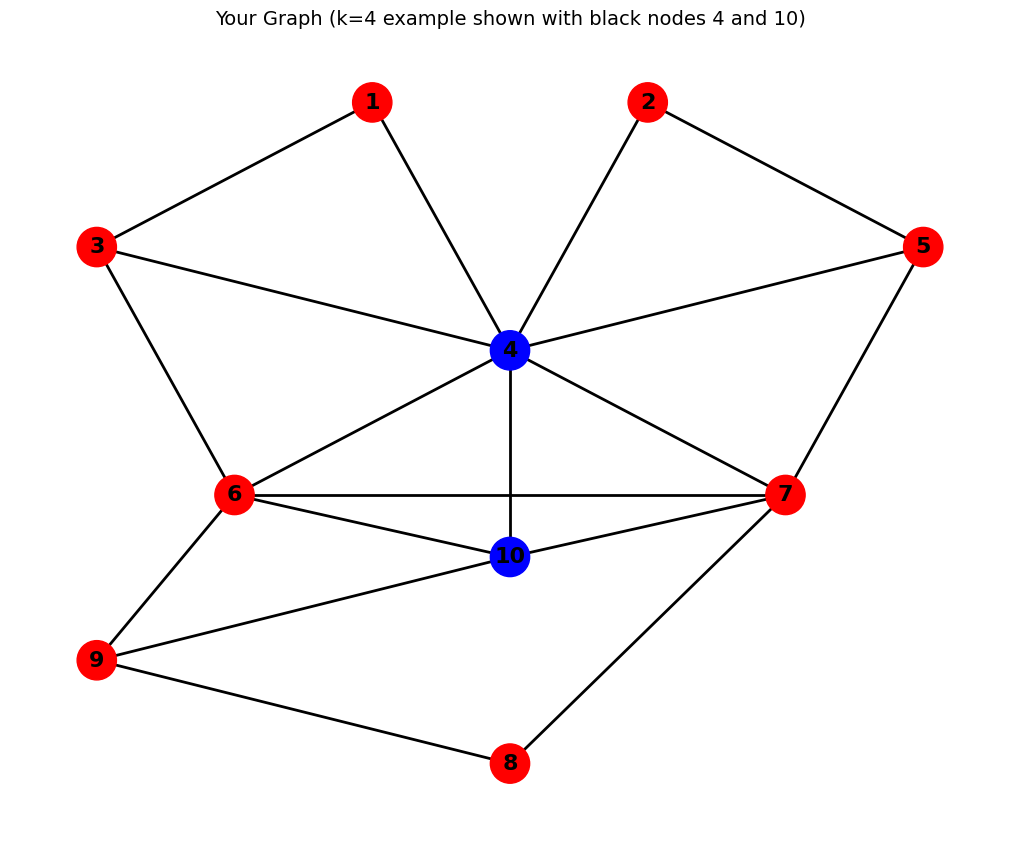

In [3]:
# CELL 3: Visualize the Graph (Exactly like your image)
plt.figure(figsize=(10, 8))
pos = {
    4: (0, 0),    # center
    10: (0, -1),
    6: (-1, -0.7),
    7: (1, -0.7),
    1: (-0.5, 1.2),
    2: (0.5, 1.2),
    3: (-1.5, 0.5),
    5: (1.5, 0.5),
    9: (-1.5, -1.5),
    8: (0, -2),
}

# Node colors: highlight node 4 and 10 in black (as in your image)
node_colors = ['blue' if n in [4,10] else 'red' for n in G.nodes()]
edge_colors = 'black'

nx.draw(G, pos, with_labels=True, node_color=node_colors,
        node_size=800, font_size=16, font_weight='bold',
        edge_color=edge_colors, width=2)

plt.title("Your Graph (k=4 example shown with black nodes 4 and 10)", fontsize=14)
plt.show()

### Find All k-Cliques

In [4]:
# CELL 4: Function to Find All k-Cliques
def find_k_cliques(G, k):
    cliques = []
    for clique in nx.enumerate_all_cliques(G):
        if len(clique) == k:
            cliques.append(sorted(clique))
        elif len(clique) > k:
            break  # optimization: larger cliques already contain smaller ones
    return [tuple(sorted(c)) for c in cliques]

print("Function defined: find_k_cliques(G, k)")

Function defined: find_k_cliques(G, k)


### The Heart of CPM – Clique Percolation

In [5]:
# CELL 5: Clique Percolation Method - Build Community Graph
def clique_percolation_communities(G, k):
    k_cliques = find_k_cliques(G, k)
    print(f"Found {len(k_cliques)} {k}-cliques:")
    for i, clique in enumerate(k_cliques):
        print(f"  {k}-clique {i+1}: {clique}")

    # Build clique overlap graph
    clique_graph = nx.Graph()
    clique_graph.add_nodes_from(range(len(k_cliques)))

    for i, j in combinations(range(len(k_cliques)), 2):
        set_i = set(k_cliques[i])
        set_j = set(k_cliques[j])
        if len(set_i.intersection(set_j)) >= k - 1:  # share at least k-1 nodes
            clique_graph.add_edge(i, j)

    # Find connected components = communities
    communities = []
    for component in nx.connected_components(clique_graph):
        community_nodes = set()
        for clique_idx in component:
            community_nodes.update(k_cliques[clique_idx])
        communities.append(sorted(list(community_nodes)))

    return communities, k_cliques

print("Clique Percolation Function Ready")

Clique Percolation Function Ready


### Run for k=4

In [6]:
# CELL 7: Run Clique Percolation with k=4 (your example)
print("CLIQUE PERCOLATION METHOD with k=4 \n")
communities_k4, cliques_k4 = clique_percolation_communities(G, k=4)

print(f"\nFound {len(communities_k4)} communities using k=4:")
for i, comm in enumerate(communities_k4):
    print(f"Community {i+1}: {comm}")

CLIQUE PERCOLATION METHOD with k=4 

Found 1 4-cliques:
  4-clique 1: (4, 6, 7, 10)

Found 1 communities using k=4:
Community 1: [4, 6, 7, 10]


### Visualize Communities with Color

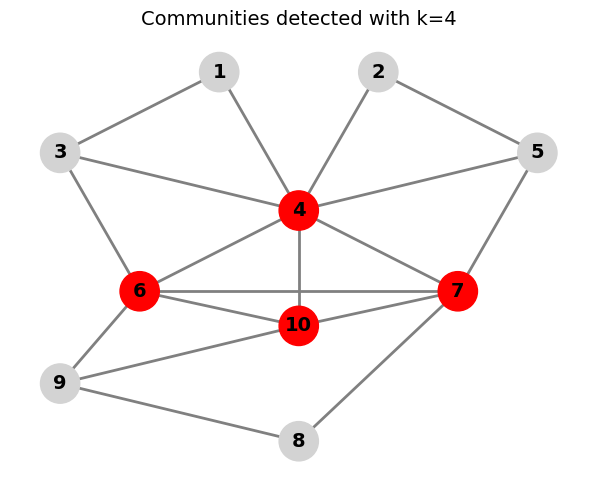

In [12]:
# CELL 8: Visualize Communities (k=3)
colors = ["red", "blue", "green", "orange", "purple", "brown", "cyan", "pink"]

plt.figure(figsize=(12, 5))

# Plot 2: k=4 communities
plt.subplot(1, 2, 2)
node_color_map_k4 = {}
for idx, comm in enumerate(communities_k4):
    for node in comm:
        node_color_map_k4[node] = colors[idx % len(colors)]

node_colors_k4 = [node_color_map_k4.get(n, 'lightgray') for n in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors_k4, node_size=800,
        font_size=14, font_weight='bold', edge_color='gray', width=2)
plt.title("Communities detected with k=4", fontsize=14)

plt.tight_layout()
plt.show()